In [8]:

import sys

import matplotlib.pyplot as plt

sys.path.append('.')

import os
import numpy as np
import torch
import pickle



In [12]:
# Initialize the dictionary to accumulate all data
wb_logs_MLPL2_all_cpu = {}

In [13]:
# Path to the folder containing pickle files
folder_path = os.path.join(os.getcwd(),"wb_logs_MLPL2")
# Iterate through the folder and read pickle files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".pickle"):
            file_path = os.path.join(root, file)
            print(file_path)
            with open(file_path, 'rb') as f:
                # Extract the integer from the filename
                num = str(file.split('_')[1].split('.')[0])
                key = str("flow_"+str(num))

                #print(key)
                # Load the dictionary from the pickle file
                data = pickle.load(f)
                # Update the accumulated dictionary
                wb_logs_MLPL2_all_cpu[key] =data[key]
                #print(data.keys())



/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_perflow_cpu/experiment_wb_logs/wb_logs_MLPL2/flow_1048.pickle
/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_perflow_cpu/experiment_wb_logs/wb_logs_MLPL2/flow_710.pickle
/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_perflow_cpu/experiment_wb_logs/wb_logs_MLPL2/flow_1035.pickle
/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_perflow_cpu/experiment_wb_logs/wb_logs_MLPL2/flow_1056.pickle
/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_perflow_cpu/experiment_wb_logs/wb_logs_MLPL2/flow_966.pickle
/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_perflow_cpu/experiment_wb_logs/wb_logs_MLPL2/flow_773.pickle
/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_p

In [16]:
print(len(wb_logs_MLPL2_all_cpu.keys()))
print(wb_logs_MLPL2_all_cpu.keys())
wb_logs_MLPL2_all_cpu['flow_0'].keys()

239
dict_keys(['flow_1048', 'flow_710', 'flow_1035', 'flow_1056', 'flow_966', 'flow_773', 'flow_295', 'flow_122', 'flow_299', 'flow_1027', 'flow_809', 'flow_909', 'flow_974', 'flow_22', 'flow_118', 'flow_933', 'flow_177', 'flow_626', 'flow_1103', 'flow_950', 'flow_525', 'flow_209', 'flow_437', 'flow_780', 'flow_554', 'flow_350', 'flow_413', 'flow_221', 'flow_196', 'flow_321', 'flow_885', 'flow_223', 'flow_240', 'flow_411', 'flow_503', 'flow_198', 'flow_1046', 'flow_285', 'flow_915', 'flow_868', 'flow_919', 'flow_819', 'flow_771', 'flow_671', 'flow_67', 'flow_864', 'flow_143', 'flow_1137', 'flow_952', 'flow_852', 'flow_51', 'flow_493', 'flow_659', 'flow_1101', 'flow_43', 'flow_755', 'flow_20', 'flow_167', 'flow_736', 'flow_564', 'flow_419', 'flow_1099', 'flow_327', 'flow_540', 'flow_431', 'flow_686', 'flow_944', 'flow_100', 'flow_1009', 'flow_1117', 'flow_732', 'flow_827', 'flow_743', 'flow_55', 'flow_1066', 'flow_489', 'flow_28', 'flow_1005', 'flow_1105', 'flow_2', 'flow_1078', 'flow_5

dict_keys(['init_chisq_dep_vars_train', 'init_chisq_num_dep_vars_train', 'init_chisq_dep_vars_train_pv', 'init_chisq_dep_vars_test', 'init_chisq_num_dep_vars_test', 'init_chisq_dep_vars_test_pv', 'res_chisq_dep_vars_test_list', 'res_chisq_num_dep_vars_test', 'res_chisq_dep_vars_test_pv', 'res_chisq_dep_vars_train_list', 'res_chisq_num_dep_vars_train', 'res_chisq_dep_vars_train', 'res_SUM_MI_test', 'res_SUM_MI_test_perm', 'res_SUM_MI_test_perm_min', 'res_SUM_MI_test_perm_max', 'res_SUM_MI_test_perm_std', 'res_SUM_MI_test_perm_avg', 'SUM_MI_train_res_perm', 'init_SUM_MI_test', 'init_SUM_MI_train', 'init_SUM_MI_test_perm', 'init_SUM_MI_test_perm_min', 'init_SUM_MI_test_perm_max', 'init_SUM_MI_test_perm_std', 'init_SUM_MI_test_perm_avg', 'init_SUM_MI_train_perm', 'init_MI_pval_train ', 'init_MI_pval_test ', 'res_MI_pval_train ', 'res_MI_pval_test ', 'init_pearson_test', 'res_pearson_test'])

In [17]:
# Save the accumulated dictionary as a pickle file
output_file = "wb_logs_MLPL2_all_cpu.pickle"
with open(output_file, 'wb') as f:
    pickle.dump(wb_logs_MLPL2_all_cpu, f)

print(f"Accumulated data saved to '{output_file}'")

Accumulated data saved to 'wb_logs_MLPL2_all_cpu.pickle'


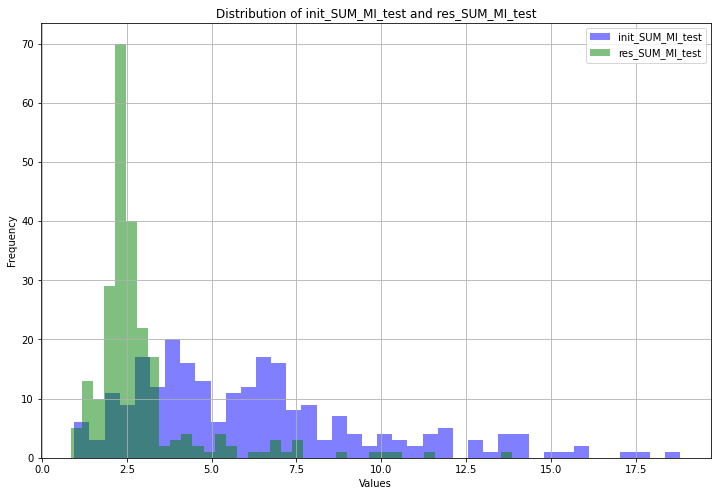

In [24]:
# Calculate the differences
init_diff_values = [wb_logs_MLPL2_all_cpu[key]['init_SUM_MI_test'] - wb_logs_MLPL2_all_cpu[key]['init_SUM_MI_test_perm_avg']
                    for key in wb_logs_MLPL2_all_cpu
                    if 'init_SUM_MI_test' in wb_logs_MLPL2_all_cpu[key] and 'init_SUM_MI_test_perm_avg' in wb_logs_MLPL2_all_cpu[key]]


In [25]:

res_diff_values = [wb_logs_MLPL2_all_cpu[key]['res_SUM_MI_test'] - wb_logs_MLPL2_all_cpu[key]['res_SUM_MI_test_perm_avg']
                   for key in wb_logs_MLPL2_all_cpu
                   if 'res_SUM_MI_test' in wb_logs_MLPL2_all_cpu[key] and 'res_SUM_MI_test_perm_avg' in wb_logs_MLPL2_all_cpu[key]]


In [29]:
# Create dictionaries to store differences
init_diff_values = {}
res_diff_values = {}

# Calculate and store differences for each key
for key in wb_logs_MLPL2_all_cpu:
    if 'res_SUM_MI_test' in wb_logs_MLPL2_all_cpu[key] and 'res_SUM_MI_test_perm_avg' in wb_logs_MLPL2_all_cpu[key] \
            and 'init_SUM_MI_test' in wb_logs_MLPL2_all_cpu[key] and 'init_SUM_MI_test_perm_avg' in wb_logs_MLPL2_all_cpu[key]:
        res_diff_values[key] = wb_logs_MLPL2_all_cpu[key]['res_SUM_MI_test'] - wb_logs_MLPL2_all_cpu[key]['res_SUM_MI_test_perm_avg']
        init_diff_values[key] = wb_logs_MLPL2_all_cpu[key]['init_SUM_MI_test'] - wb_logs_MLPL2_all_cpu[key]['init_SUM_MI_test_perm_avg']


{'flow_1048': 0.7090698595130405,
 'flow_710': 0.24898673552681072,
 'flow_1035': 0.21190423277770432,
 'flow_1056': 0.3833017465093147,
 'flow_966': 1.132663600971993,
 'flow_773': 3.113481662057004,
 'flow_295': 0.9115892862316106,
 'flow_122': 0.8502442952330105,
 'flow_299': 0.3351464744232422,
 'flow_1027': 0.5145657541605877,
 'flow_809': 1.8725971258543739,
 'flow_909': 0.5099312933642794,
 'flow_974': 0.2235086430961566,
 'flow_22': 0.41111798767655605,
 'flow_118': 0.2611999177336286,
 'flow_933': 0.5661502524611346,
 'flow_177': 0.3825050243249841,
 'flow_626': 0.07586509768110306,
 'flow_1103': 0.8468200070297054,
 'flow_950': 0.9837514868167283,
 'flow_525': 0.28682103738748843,
 'flow_209': 0.5888600879277837,
 'flow_437': 0.19836260650749027,
 'flow_780': 0.4420682383440271,
 'flow_554': 5.016701989998134,
 'flow_350': 8.481609698937241,
 'flow_413': 1.2754610272223625,
 'flow_221': 0.4982099965697442,
 'flow_196': 0.048905923560282005,
 'flow_321': 0.2117148540105771,
 '

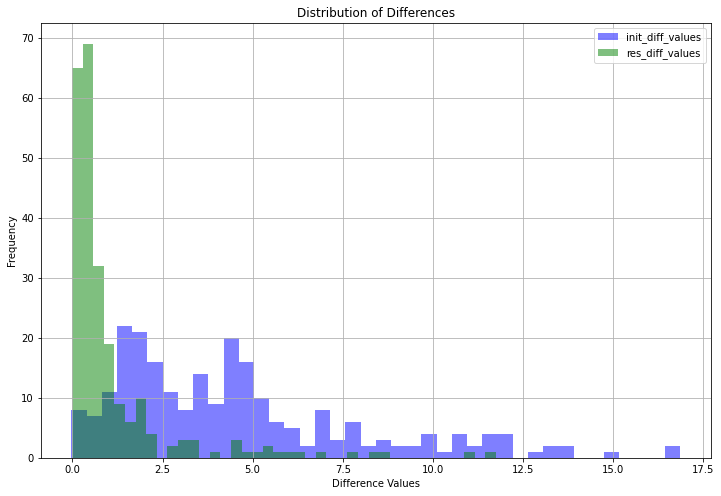

In [33]:
# Extract values from dictionaries
init_diff_values_list = list(init_diff_values.values())
res_diff_values_list = list(res_diff_values.values())

# Plotting both distributions overlaid
plt.figure(figsize=(12, 8))
plt.hist(init_diff_values_list, bins=40, color='blue', alpha=0.5, label='init_diff_values')
plt.hist(res_diff_values_list, bins=40, color='green', alpha=0.5, label='res_diff_values')
plt.title('Distribution of Differences')
plt.xlabel('Difference Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Find keys based on the given criteria
candidate_keys = [key for key in wb_logs_MLPL2_all_cpu
                 if 'res_SUM_MI_test' in wb_logs_MLPL2_all_cpu[key]
                 and 'res_SUM_MI_test_perm_avg' in wb_logs_MLPL2_all_cpu[key]
                 and 'init_SUM_MI_test' in wb_logs_MLPL2_all_cpu[key]
                 and 'init_SUM_MI_test_perm_avg' in wb_logs_MLPL2_all_cpu[key]
                 and res_diff_values[key] > 2.5
                 and res_diff_values[key] < init_diff_values[key]]

# Print the selected keys
print("candiate Keys:")
#
candidate_keys = sorted(candidate_keys)
# Save selected_keys as candidate_keys.pickle
with open('candidate_keys.pickle', 'wb') as f:
    pickle.dump(candidate_keys, f)
print(candidate_keys)
#print("Selected keys saved as 'candidate_keys.pickle'")

candiate Keys:
['flow_1088', 'flow_143', 'flow_220', 'flow_259', 'flow_296', 'flow_346', 'flow_350', 'flow_37', 'flow_510', 'flow_516', 'flow_532', 'flow_541', 'flow_554', 'flow_559', 'flow_564', 'flow_567', 'flow_573', 'flow_574', 'flow_578', 'flow_622', 'flow_641', 'flow_667', 'flow_773']


['flow_1088',
 'flow_143',
 'flow_220',
 'flow_259',
 'flow_296',
 'flow_346',
 'flow_350',
 'flow_37',
 'flow_510',
 'flow_516',
 'flow_532',
 'flow_541',
 'flow_554',
 'flow_559',
 'flow_564',
 'flow_567',
 'flow_573',
 'flow_574',
 'flow_578',
 'flow_622',
 'flow_641',
 'flow_667',
 'flow_773']

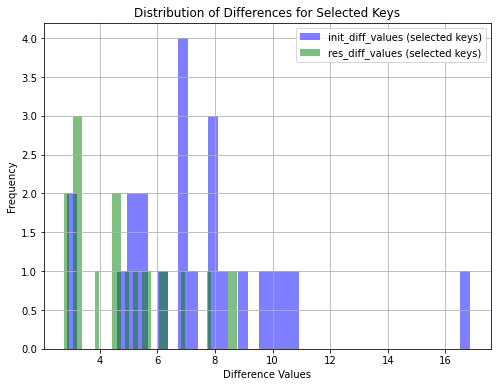

In [41]:

# Filter values based on selected_keys
init_diff_values_selected = [init_diff_values[key] for key in candidate_keys if key in init_diff_values]
res_diff_values_selected = [res_diff_values[key] for key in candidate_keys if key in res_diff_values]

# Plotting both distributions overlaid for selected keys
plt.figure(figsize=(8, 6))
plt.hist(init_diff_values_selected, bins=40, color='blue', alpha=0.5, label='init_diff_values (selected keys)')
plt.hist(res_diff_values_selected, bins=40, color='green', alpha=0.5, label='res_diff_values (selected keys)')
plt.title('Distribution of Differences for Selected Keys')
plt.xlabel('Difference Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [42]:

# Filter wb_logs_MLPL2_all_cpu based on selected_keys
wb_logs_MLPL2_candidate_cpu = {key: wb_logs_MLPL2_all_cpu[key] for key in candidate_keys if key in wb_logs_MLPL2_all_cpu}

# Save wb_logs_MLPL2_candidate_cpu as wb_logs_MLPL2_candidate_cpu.pickle
with open('wb_logs_MLPL2_candidate_cpu.pickle', 'wb') as f:
    pickle.dump(wb_logs_MLPL2_candidate_cpu, f)

print("Filtered data saved as 'wb_logs_MLPL2_candidate_cpu.pickle'")

Filtered data saved as 'wb_logs_MLPL2_candidate_cpu.pickle'
